In [1]:
from model import CNN3Layer
from train import train_model, test_model
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [ ]:
# Data augmentation for training set: random crop + horizontal flip
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),   # randomly crop images with padding
    transforms.RandomHorizontalFlip(),      # flip images horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),                  # convert PIL image to PyTorch tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465),  # CIFAR-10 mean
                         (0.2023, 0.1994, 0.2010))  # CIFAR-10 std
])

# Validation / test: only normalization
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2023, 0.1994, 0.2010))
])

trainset_full = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform_train)
train_size = int(0.8 * len(trainset_full))
val_size = len(trainset_full) - train_size
trainset, valset = random_split(trainset_full, [train_size, val_size])
valset.dataset.transform = transform_test

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
valloader = DataLoader(valset, batch_size=64, shuffle=False)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


Epoch 1/50: Train Loss 1.393, Acc 49.30% | Val Loss 1.096, Acc 60.62% | LR: 0.001000
Epoch 2/50: Train Loss 1.036, Acc 63.19% | Val Loss 0.940, Acc 67.60% | LR: 0.001000
Epoch 3/50: Train Loss 0.912, Acc 68.18% | Val Loss 0.864, Acc 69.78% | LR: 0.001000
Epoch 4/50: Train Loss 0.815, Acc 71.63% | Val Loss 0.760, Acc 73.27% | LR: 0.001000
Epoch 5/50: Train Loss 0.742, Acc 73.78% | Val Loss 0.750, Acc 74.08% | LR: 0.001000
Epoch 6/50: Train Loss 0.682, Acc 76.44% | Val Loss 0.782, Acc 73.05% | LR: 0.001000
Epoch 7/50: Train Loss 0.631, Acc 77.92% | Val Loss 0.712, Acc 74.82% | LR: 0.001000
Epoch 8/50: Train Loss 0.571, Acc 79.95% | Val Loss 0.715, Acc 76.17% | LR: 0.001000
Epoch 9/50: Train Loss 0.532, Acc 81.36% | Val Loss 0.704, Acc 77.00% | LR: 0.001000
Epoch 10/50: Train Loss 0.487, Acc 82.86% | Val Loss 0.661, Acc 77.94% | LR: 0.001000
Epoch 11/50: Train Loss 0.452, Acc 83.89% | Val Loss 0.727, Acc 76.15% | LR: 0.001000
Epoch 12/50: Train Loss 0.411, Acc 85.37% | Val Loss 0.793, Acc

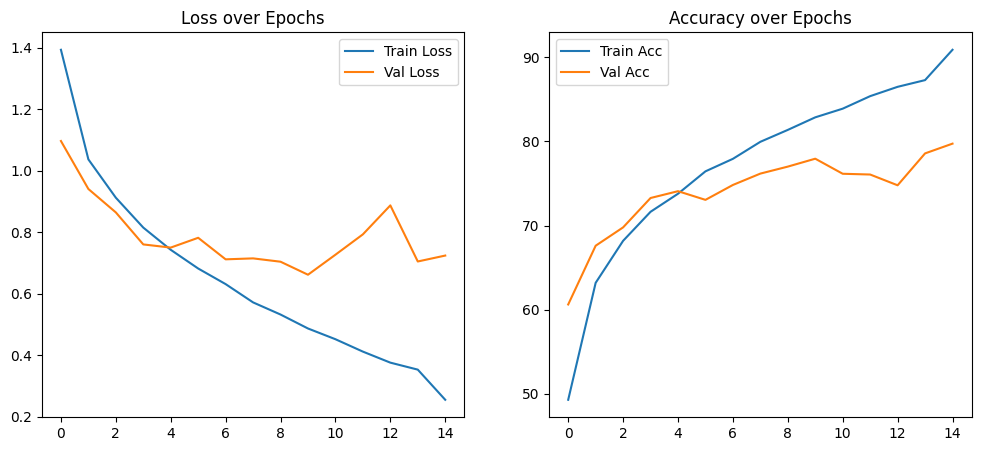

In [5]:
net = CNN3Layer()
net = train_model(net, trainloader, valloader, epochs=50, lr=0.001, patience=5)

In [6]:
test_model(net, testloader)

Final Test Accuracy: 77.56%
